In [3]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
from scipy.stats import linregress

In [4]:
#load csv data files
zillow_metro_df = pd.read_csv("Output/zillow_census_metro.csv")
zillow_suburb_df = pd.read_csv("Output/zillow_census_suburb.csv")
zillow_combined_df = zillow_metro_df.append(zillow_suburb_df)                                      
zillow_combined_df = zillow_combined_df.sort_values(by=["HomeValue","Household Income"])
zillow_metro_df = zillow_metro_df.sort_values(by=["HomeValue","Household Income"])
zillow_metro_df.head()

,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
21806,24724,WV,Bramwell,Bluefield,Mercer County,16013.0,107.0,45.1,56250.0,15775.0,2.0,1.869159
19155,24736,WV,Lashmeet,Bluefield,Mercer County,16417.0,584.0,50.8,30833.0,17551.0,122.0,20.890411
12090,17948,PA,Mahanoy City,Pottsville,Schuylkill County,18117.0,4677.0,36.7,38203.0,20241.0,1232.0,26.341672
20737,25142,WV,Alum Creek,Charleston,Kanawha County,19316.0,486.0,43.3,55000.0,21414.0,88.0,18.106996
6498,48505,MI,Flint,Flint,Genesee County,20289.0,20327.0,34.6,25949.0,14495.0,8481.0,41.722832


# Understand outliners

137669.0,339294.5,-164769.25,641732.75
Values below -164769.25 could be outliers.
Values above 641732.75 could be outliers.
0.06868696088722559 is considered outliners in this dataset


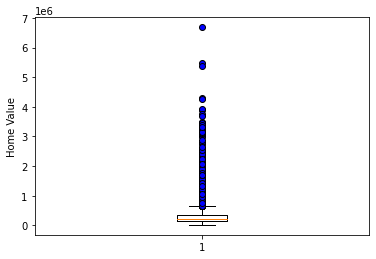

In [10]:
fig, ax = plt.subplots()
ax.boxplot(zc_metro['HomeValue'],flierprops=dict(markerfacecolor='b', label='not shown'))
ax.set_ylabel('Home Value')
quartiles = zc_metro['HomeValue'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"{lowerq},{upperq},{lower_bound},{upper_bound}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliner_count = zc_metro.loc[zc_metro['HomeValue']>641732.75,:]['HomeValue'].count()
outliner_pert = outliner_count/zc_metro['HomeValue'].count()
print(f"{outliner_pert} is considered outliners in this dataset")

plt.show()

85330.0,167855.75,-38458.625,291644.375
Values below -38458.625 could be outliers.
Values above 291644.375 could be outliers.
0.3216192779882251 is considered outliners in this dataset


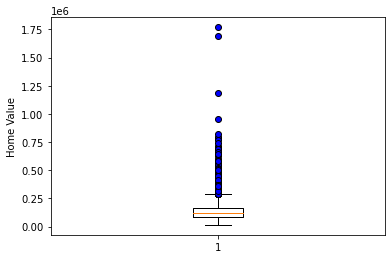

In [11]:
fig, ax = plt.subplots()
ax.boxplot(zc_suburb['HomeValue'],flierprops=dict(markerfacecolor='b', label='not shown'))
ax.set_ylabel('Home Value')
quartiles = zc_suburb['HomeValue'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#ax.set_xticklabels()
print(f"{lowerq},{upperq},{lower_bound},{upper_bound}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliner_count = zc_metro.loc[zc_metro['HomeValue']>291644.375,:]['HomeValue'].count()
outliner_pert = outliner_count/zc_metro['HomeValue'].count()
print(f"{outliner_pert} is considered outliners in this dataset")
plt.show()

# US Meidan Home Value and Poverty Rate Analysis
* We are looking for relationship between poverty rate and home value, but our analysis doesn't prove there is a strong linear correlation at the zipcode level between Poverty rate and home value.  
* New York has relatively high poverty rate but also one of the places have the most expensive housing, so the scatter plot shows there is no coorelation between these two variables.

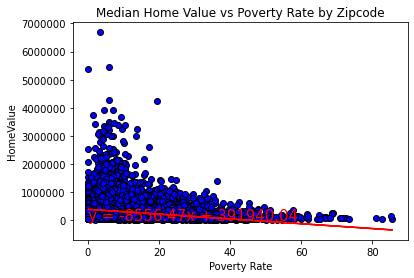

The r is: -0.2657548866258657


In [30]:
# Relationship between Poverty Rate vs Home Value for Metro area
x_values = zc_metro['Poverty Rate']
y_values = zc_metro['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate by Zipcode')
plt.xlabel('Poverty Rate')
plt.ylabel('HomeValue')
plt.show()
print(f"The r is: {rvalue}")

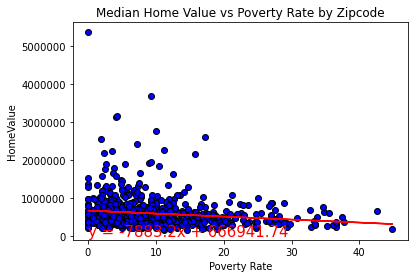

The r is: -0.14640133870691452


In [31]:
# Relationship between Poverty Rate vs Home Value for Atlanta metro area
zc_metro_ny = zc_metro.loc[zc_metro['Metro'] == 'New York-Newark-Jersey City',:]
x_values = zc_metro_ny['Poverty Rate']
y_values = zc_metro_ny['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate by Zipcode')
plt.xlabel('Poverty Rate')
plt.ylabel('HomeValue')
plt.show()
print(f"The r is: {rvalue}")

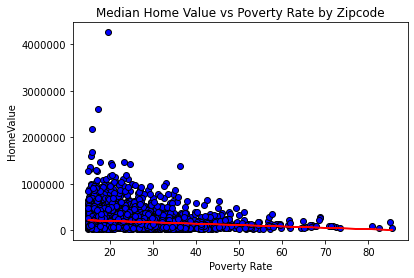

The r is: -0.13656326137507052


In [32]:
# add correlation
# Relationship between Poverty Rate vs Home Value for Metro area
zc_metro_pr_fl=zc_metro.loc[zc_metro['Poverty Rate']>15,:]
x_values = zc_metro_pr_fl['Poverty Rate']
y_values = zc_metro_pr_fl['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate by Zipcode')
plt.xlabel('Poverty Rate')
plt.ylabel('HomeValue')
ax.ticklabel_format(useOffset=False)
plt.show()
print(f"The r is: {rvalue}")

# US Meidan Home Value and Median Age by Zipcode Analysis
* People ugrade housing between 20 - 55s, and start to downgrde around 55
* No linear relationship spot from this analysis between median home value and median age by zipcode
* Metro and Suburb data shows similar trends when breaking the data to different age bucket, however, for age above 55, in the metro graph, it shows about the same Median Home Value between two age bucket, but in suburb, there is an increase in the Home Value when age goes up, it coule indicate city retirees moved to suburb for bigger areas, but more analysis need to be done to answer that question.

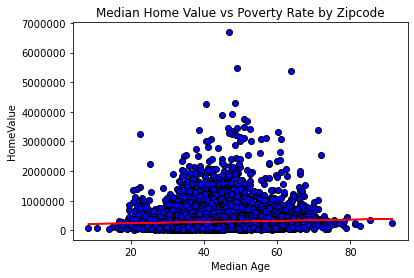

The r-squared is: 0.05608331564395308


In [33]:
# Median Age vs Home Value at zipcode level for metro areas
x_values = zc_metro['Median Age']
y_values = zc_metro['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate by Zipcode')
plt.xlabel('Median Age')
plt.ylabel('HomeValue')
plt.show()
print(f"The r-squared is: {rvalue}")

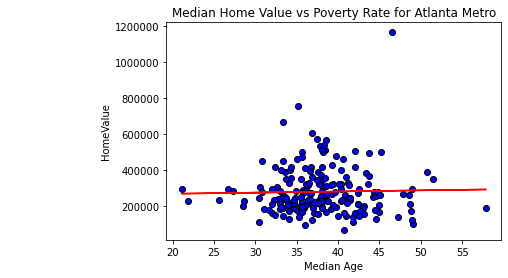

The r-squared is: 0.024840419080222328


In [34]:
# Median Age vs Home Value at zipcode level for Atlanta metro areas
zc_metro_ny = zc_metro.loc[zc_metro['Metro'] == 'Atlanta-Sandy Springs-Roswell',:]
x_values = zc_metro_ny['Median Age']
y_values = zc_metro_ny['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate for Atlanta Metro')
plt.xlabel('Median Age')
plt.ylabel('HomeValue')
plt.show()
print(f"The r-squared is: {rvalue}")

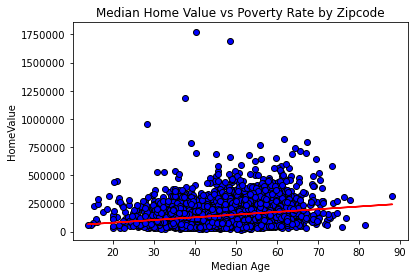

The r-squared is: 0.22181730853669598


In [35]:
## Median Age vs Home Value at zipcode level for suburb areas
x_values = zc_suburb['Median Age']
y_values = zc_suburb['HomeValue']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(x_values,y_values,marker="o",color="blue",edgecolors="black")
ax.plot(x_values,regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Median Home Value vs Poverty Rate by Zipcode')
plt.xlabel('Median Age')
plt.ylabel('HomeValue')
plt.show()
print(f"The r-squared is: {rvalue}")

<Figure size 720x432 with 0 Axes>

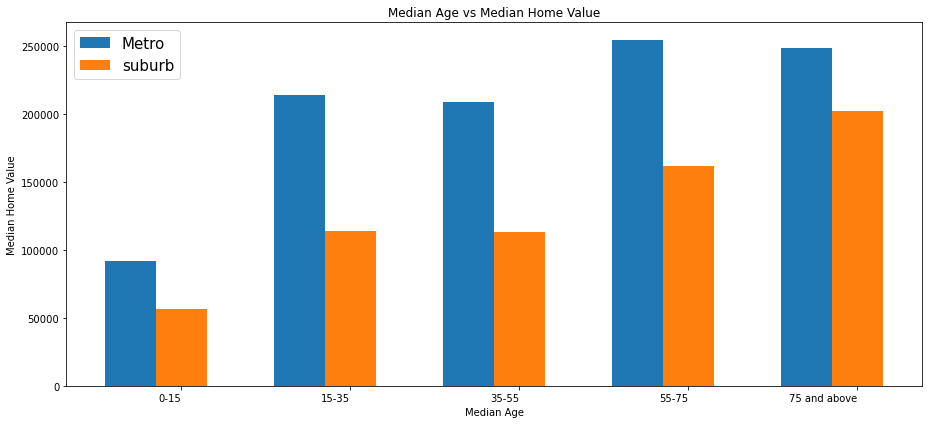

In [29]:
#Group dataset by age group for metro data
age_0_15 = zc_metro.loc[(zc_metro['Median Age']>=0)&(zc_metro['Median Age']<15),:]
age_15_35 = zc_metro.loc[(zc_metro['Median Age']>=15)&(zc_metro['Median Age']<35),:]
age_35_55 = zc_metro.loc[(zc_metro['Median Age']>=35)&(zc_metro['Median Age']<55),:]
age_55_75 = zc_metro.loc[(zc_metro['Median Age']>=55)&(zc_metro['Median Age']<75),:]
age_75_above = zc_metro.loc[zc_metro['Median Age']>75,:]

#ACalculate HomeValue median and assign to variables by age group for metro data
home_median_value = []
age_0_20_hv=age_0_15['HomeValue'].median()
age_20_35_hv=age_15_35['HomeValue'].median()
age_35_55_hv=age_35_55['HomeValue'].median()
age_55_75_hv=age_55_75['HomeValue'].median()
age_75_above_hv=age_75_above['HomeValue'].median()
home_median_value_metro = [age_0_20_hv,age_20_35_hv,age_35_55_hv,age_55_75_hv,age_75_above_hv]

#Group dataset by age group for suburb data
age_0_15 = zc_suburb.loc[(zc_suburb['Median Age']>=0)&(zc_suburb['Median Age']<15),:]
age_15_35 = zc_suburb.loc[(zc_suburb['Median Age']>=15)&(zc_suburb['Median Age']<35),:]
age_35_55 = zc_suburb.loc[(zc_suburb['Median Age']>=35)&(zc_suburb['Median Age']<55),:]
age_55_75 = zc_suburb.loc[(zc_suburb['Median Age']>=55)&(zc_suburb['Median Age']<75),:]
age_75_above = zc_suburb.loc[zc_suburb['Median Age']>75,:]

#Calculate HomeValue median and assign to variables by age group for suburb data
home_median_value = []
age_0_20_hv=age_0_15['HomeValue'].median()
age_20_35_hv=age_15_35['HomeValue'].median()
age_35_55_hv=age_35_55['HomeValue'].median()
age_55_75_hv=age_55_75['HomeValue'].median()
age_75_above_hv=age_75_above['HomeValue'].median()
home_median_value_suburb = [age_0_20_hv,age_20_35_hv,age_35_55_hv,age_55_75_hv,age_75_above_hv]

# Draw the bar graph side by side
plt.figure(figsize=(10,6))
tick_locations = ['0-15','15-35','35-55','55-75','75 and above']
index = np.arange(5)
bar_width = 0.30
plt.figure(figsize=(13,6))
r1 = plt.bar(index, home_median_value_metro, bar_width,align="center", label = 'Metro')
r2 = plt.bar(index+bar_width, home_median_value_suburb,  bar_width,align="center", label = 'suburb')
plt.title("Median Age vs Median Home Value")
plt.xlabel('Median Age')
plt.ylabel('Median Home Value')
plt.xticks(index+bar_width, tick_locations, horizontalalignment = 'right')
plt.legend(loc = 'upper left',fontsize = '15' )
plt.tight_layout()
plt.show()

# US Meidan Home Value and Household Income Analsyis by Zipcode

R value is 0.6322946400845407


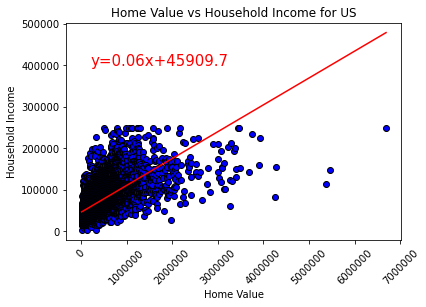

In [5]:
#plot total data
fig, ax = plt.subplots()
total_plot = plt.scatter(zillow_combined_df["HomeValue"],zillow_combined_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(zillow_combined_df["HomeValue"],zillow_combined_df["Household Income"])
regress_values = zillow_combined_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(zillow_combined_df["HomeValue"],regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for US")
plt.annotate(line_eq, (200000,400000),fontsize=15,color="red")
print(f"R value is {rvalue}")

R value is 0.6219785137089932


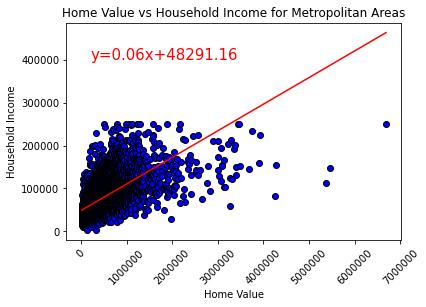

In [6]:
#plot metro data
fig, ax = plt.subplots()
metro_plot = plt.scatter(zillow_metro_df["HomeValue"],zillow_metro_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(zillow_metro_df["HomeValue"],zillow_metro_df["Household Income"])
regress_values = zillow_metro_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(zillow_metro_df["HomeValue"],regress_values,"r-")
ax.ticklabel_format(useOffset=False,style='plain')
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for Metropolitan Areas")
plt.annotate(line_eq, (200000,400000),fontsize=15,color="red")
print(f"R value is {rvalue}")

In [7]:
#plot atlanta data
atl_df = zillow_combined_df.loc[zillow_combined_df["Metro"]=="Atlanta-Sandy Springs-Roswell",:]
atl_df.sort_values(by = ["HomeValue"])

,RegionName,StateName,City,Metro,CountyName,HomeValue,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
11254,31816,GA,Manchester,Atlanta-Sandy Springs-Roswell,Meriwether County,65599.0,5271.0,40.7,36942.0,23254.0,1090.0,20.679188
16244,30216,GA,Flovilla,Atlanta-Sandy Springs-Roswell,Butts County,91725.0,2361.0,36.0,38329.0,18918.0,599.0,25.370606
14236,30293,GA,Woodbury,Atlanta-Sandy Springs-Roswell,Meriwether County,99397.0,2609.0,49.1,28750.0,19268.0,700.0,26.830203
12269,30222,GA,Greenville,Atlanta-Sandy Springs-Roswell,Meriwether County,107589.0,4089.0,41.8,32983.0,17696.0,1125.0,27.512839
4907,30297,GA,Forest Park,Atlanta-Sandy Springs-Roswell,Clayton County,109103.0,28966.0,30.4,36480.0,15459.0,7251.0,25.032797
...,...,...,...,...,...,...,...,...,...,...,...,...
4836,30307,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,571794.0,20036.0,37.4,105912.0,71222.0,1969.0,9.827311
712,30319,GA,Brookhaven,Atlanta-Sandy Springs-Roswell,Dekalb County,602463.0,43011.0,36.8,104435.0,75567.0,2988.0,6.947060
2479,30342,GA,Sandy Springs,Atlanta-Sandy Springs-Roswell,Fulton County,664498.0,30873.0,33.4,91740.0,78719.0,2331.0,7.550287
3532,30306,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,754452.0,23973.0,35.2,108973.0,85547.0,1965.0,8.196721


R value is 0.7907298736315531


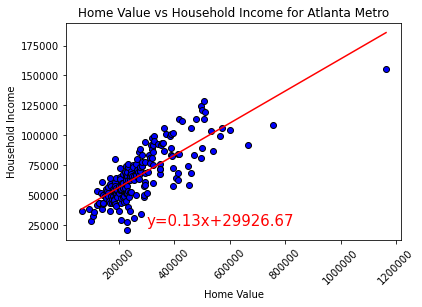

In [8]:
fig, ax = plt.subplots()
total_plot = plt.scatter(atl_df["HomeValue"],atl_df["Household Income"],marker="o",color="blue",edgecolors="black")
(slope,intercept,rvalue,pvalue,stderr) = linregress(atl_df["HomeValue"],atl_df["Household Income"])
regress_values = atl_df["HomeValue"]*slope + intercept
line_eq = "y=" +str(round(slope,2))+ "x+" +str(round(intercept,2))
ax.plot(atl_df["HomeValue"],regress_values,"r-")
plt.xticks(rotation=45)
plt.xlabel("Home Value")
plt.ylabel("Household Income")
plt.title("Home Value vs Household Income for Atlanta Metro")
ax.ticklabel_format(useOffset=False,style='plain')
plt.annotate(line_eq, (300000,25000),fontsize=15,color="red")
print(f"R value is {rvalue}")